# ScipyはNumpyをベースにしている

In [98]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [99]:
a = np.r_[3,[0]*5,-1:1:10j]

In [100]:
print(a)

[ 3.          0.          0.          0.          0.          0.         -1.
 -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111  0.33333333
  0.55555556  0.77777778  1.        ]


In [101]:
np.mgrid[0:4,0:5] #0,1,2,3と0,1,2,3,4との総当りペアを作る

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [102]:
# 多項式
from numpy import poly1d
p = poly1d([2,3])
print(p) #2x + 3のこと

 
2 x + 3


In [103]:
p([0,1,2,3,4]) #x=0,1,2,3,4を代入した答えを返す

array([ 3,  5,  7,  9, 11])

In [104]:
p*p #(2x+3) * (2x+3)=4x^2 + 12x + 9のこと

poly1d([ 4, 12,  9])

In [105]:
p.deriv() # 微分して2だけが残る

poly1d([2])

In [106]:
p.integ() # x^2 + 3x + 0を微分すると2x +3になる

poly1d([ 1.,  3.,  0.])

In [107]:
p.integ(k=4) # 定数項は指定できる

poly1d([ 1.,  3.,  4.])

In [108]:
# 2引数を取って１値を返す関数を、２ベクトルを取って１ベクトルを返す関数にする。「ベクトライズ」する
def myf1(x,y):
    tmp1 = x+y
    tmp2 = x*y
    if(tmp1 > tmp2):
        return(tmp1)
    else:
        return(tmp2)

print(myf1(10,3))
print(myf1(2,0.5))

30
2.5


In [109]:
vec_myf1 = np.vectorize(myf1)
vec_myf1([10,2],[3,0.5])

array([ 30. ,   2.5])

In [110]:
# numpyはデータタイプを揃えて値を格納するので、numpy.arrayオブジェクトにはデータタイプが付随している
np.pi
a = np.array(np.pi)
a.dtype


dtype('float64')

In [111]:
# dtypeをcastできる
np.cast['c8'](np.pi)

array((3.1415927410125732+0j), dtype=complex64)

In [112]:
np.cast['f'](np.pi) == np.pi

False

In [113]:
x = np.linspace(2.0, 3.0, num = 4, retstep=True)

In [114]:
x


(array([ 2.        ,  2.33333333,  2.66666667,  3.        ]),
 0.3333333333333333)

In [115]:
x[0][1]

2.3333333333333335

In [116]:
x[1]

0.3333333333333333

# Scipyが提供しているもの

* cluster クラスタリング
* constants 特殊な科学定数
* fftpack FFT
* integrate 積分計算、常微分
* interpolate 補間
* linalg 線形代数
* ndimage n-次元画像処理
* odr Orthogonal distance regression (横軸固定で縦軸の誤差を最小にするのではなく、回帰線への最短距離（垂線距離）を最小にする回帰
* optimize 最適化と解探索
* signal シグナル処理
* sparse 疎行列関連
* spatial 空間データ処理
* special 特殊関数
* stats 統計分布関数

# 特殊関数の一群

数物系特殊関数

In [117]:
import scipy as sp

In [118]:
# 特殊関数一覧
# 知らない関数はどのみち使えないので、使いたい関数の名前が分かった時に検索すれば良い
# help(sp.special)

# 積分と常微分方程式解

$$
E_n(x) = \int_1^\infty \frac{e^{-xt}}{t^n} dt .
$$

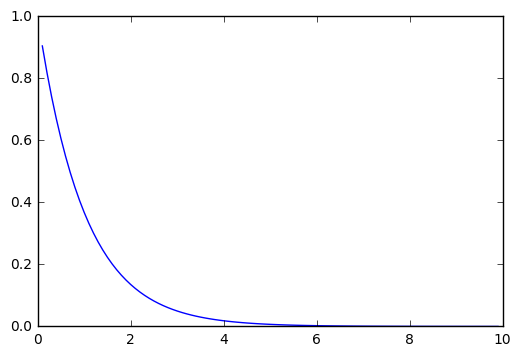

In [153]:
import scipy.integrate as spint

def integrand(t,n,x):
    return np.exp(-x*t)/t**n

vec_integrand = np.vectorize(integrand)
y = vec_integrand(1,2,np.arange(0.1,10,0.1))
plt.plot(np.arange(0.1,10,0.1),y)
plt.show()

In [140]:
integrand(1,0,0)

1.0

In [145]:
def expint(n,x):
    return spint.quad(integrand,1,np.inf,args=(n, x))[0]

In [156]:
vec_expint = np.vectorize(expint)
xx = np.arange(0.001,3,0.1)
y = vec_expint(3,xx)

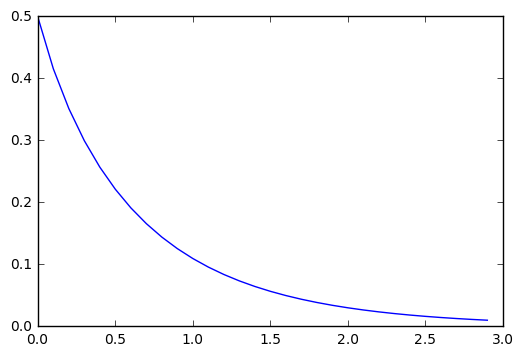

In [157]:
plt.plot(xx,y)
plt.show()